Found 2 faces.


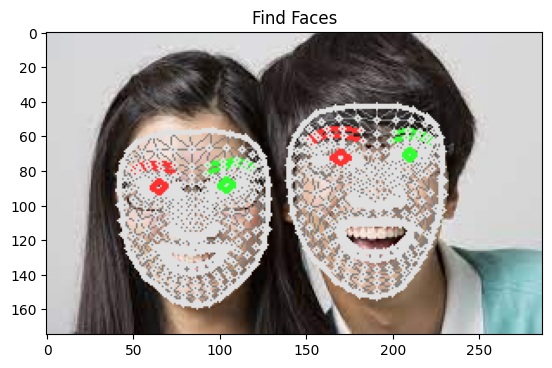

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

static_image_mode = True
max_num_faces = 10
refine_landmarks = True
min_detection_confidence = 0.5

image_path = './face_image.jpg'
image = cv2.imread(image_path)

# 이미지가 성공적으로 로드되었는지 확인
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

with mp_face_mesh.FaceMesh(static_image_mode=static_image_mode, 
                           max_num_faces=max_num_faces, 
                           refine_landmarks=refine_landmarks, 
                           min_detection_confidence=min_detection_confidence) as face_mesh:
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.multi_face_landmarks:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.multi_face_landmarks)))
        
        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(image=annotated_image, 
                                      landmark_list=face_landmarks, 
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=drawing_spec, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=drawing_spec,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_IRISES,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
            
        # 이미지를 Matplotlib을 사용하여 표시
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.title("Find Faces")
        plt.show()


In [9]:
image_path = 'C:/Users/user/Documents/study/Final project/개인_git/face_image.jpg'

In [7]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# mediapipe 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# 얼굴 랜드마크에 대한 그리기 스펙 지정
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# 동영상 파일 경로
video_path = '../../연습.mp4'

# 동영상 파일 열기
cap = cv2.VideoCapture(video_path)

# 동영상이 정상적으로 열렸는지 확인
if not cap.isOpened():
    raise FileNotFoundError(f"비디오 파일을 찾을 수 없습니다: {video_path}")

# mediapipe FaceMesh 인스턴스 생성
with mp_face_mesh.FaceMesh(static_image_mode=False,  # 한번에 하나의 얼굴만 처리하도록 
                           max_num_faces=10,    # 처리할 최대 얼굴 수 제어
                           refine_landmarks=True,   # 랜드마크 위치를 미세하게 조정할지 여부
                           min_detection_confidence=0.5,    # 얼굴 검출을 위한 최소 신뢰도
                           min_tracking_confidence=0.5) as face_mesh:   # 얼굴 추적을 위한 최소 신뢰도

    # 동영상 프레임을 순회하며 처리
    while cap.isOpened():
        # 동영상에서 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            break

        # BGR을 RGB로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 얼굴 랜드마크 검출
        results = face_mesh.process(rgb_frame)

        # 얼굴 랜드마크를 프레임에 표시
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(image=frame, 
                                          landmark_list=face_landmarks, 
                                          connections=mp_face_mesh.FACEMESH_TESSELATION,
                                          landmark_drawing_spec=drawing_spec, 
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_CONTOURS,
                                          landmark_drawing_spec=drawing_spec,
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_IRISES,
                                          landmark_drawing_spec=None,
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

        # 얼굴 랜드마크가 표시된 이미지를 화면에 표시
        cv2.imshow('Face Landmarks Detection', frame)

        # 'q' 키를 누르면 반복문 종료
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

    # 처리가 끝나면 리소스 해제
    cap.release()
    cv2.destroyAllWindows()


In [5]:
frame.size

864000

In [6]:
frame.shape

(400, 720, 3)

In [9]:
import cv2
import mediapipe as mp

# mediapipe 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# 얼굴 랜드마크에 대한 그리기 스펙 지정
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# 동영상 파일 경로
video_path = '../../연습1.mp4'

# 동영상 파일 열기
cap = cv2.VideoCapture(video_path)

# 총 프레임 수 
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"총 프레임 수 : {total_frames}")

# 동영상이 정상적으로 열렸는지 확인
if not cap.isOpened():
    raise FileNotFoundError(f"비디오 파일을 찾을 수 없습니다: {video_path}")

# mediapipe FaceMesh 인스턴스 생성
with mp_face_mesh.FaceMesh(static_image_mode=False,  # 한번에 하나의 얼굴만 처리하도록 
                           max_num_faces=1,    # 처리할 최대 얼굴 수 제어
                           refine_landmarks=True,   # 랜드마크 위치를 미세하게 조정할지 여부
                           min_detection_confidence=0.5,    # 얼굴 검출을 위한 최소 신뢰도
                           min_tracking_confidence=0.85) as face_mesh:

    frame_count_with_landmarks = 0

    # 동영상 프레임을 순회하며 처리
    while cap.isOpened():
        # 동영상에서 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            break

        # BGR을 RGB로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 얼굴 랜드마크 검출
        results = face_mesh.process(rgb_frame)

        # 얼굴 랜드마크를 프레임에 표시
        if results.multi_face_landmarks:
            frame_count_with_landmarks += 1

            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(image=frame, 
                                          landmark_list=face_landmarks, 
                                          connections=mp_face_mesh.FACEMESH_TESSELATION,
                                          landmark_drawing_spec=drawing_spec, 
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_CONTOURS,
                                          landmark_drawing_spec=drawing_spec,
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_IRISES,
                                          landmark_drawing_spec=None,
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

        # 얼굴 랜드마크가 표시된 이미지를 화면에 표시
        cv2.imshow('Face Landmarks Detection', frame)

        # 'q' 키를 누르면 반복문 종료
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

    # 처리가 끝나면 리소스 해제
    cap.release()
    cv2.destroyAllWindows()

# 전체 프레임 중 얼굴 랜드마크가 검출된 프레임 수 출력
print(f"얼굴 랜드마크가 검출된 총 프레임 수: {frame_count_with_landmarks}")

Detection = frame_count_with_landmarks/total_frames
N_Detection = 1 - Detection

print(f"강사 정면 응시 퍼센트 :{Detection}%")
print(f"강사 정면 비응시 퍼센트 :{N_Detection}%")

총 프레임 수 : 925
얼굴 랜드마크가 검출된 총 프레임 수: 367
강사 정면 응시 퍼센트 :0.39675675675675676%
강사 정면 비응시 퍼센트 :0.6032432432432433%


In [17]:
# 총 프레임 수 랑 랜드마크 검출된 프레임 수 비교(100퍼센트 시 총프레임 수 + 랜드마크 검출된 프레임이 됨)
import plotly.express as px

# 데이터 예시 (라벨과 해당하는 값)
labels = ['A', 'B']
values = [total_frames, frame_count_with_landmarks]

# 파이 차트 생성
fig = px.pie(labels=labels, values=values, title='간단한 파이 차트')

# 차트 보여주기
fig.show()

In [36]:
# 음 
import plotly.express as px

# 데이터 예시 (라벨과 해당하는 값)
labels = ['검출', '비검출']
values = [Detection, N_Detection]

# 파이 차트 생성
fig = px.pie(labels=labels, values=values, title='간단한 파이 차트')

# 차트 보여주기
fig.show()

In [1]:
# 동영상 50개에 대한 반복문 생성
import cv2
import mediapipe as mp
import json
from collections import OrderedDict

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# 전체 동영상 수
total_videos = 48

for video_index in range(total_videos):
    # 동영상 파일 경로
    # video_path = f'../../연습강의/{video_index}.mp4'
    video_path = f'D:\ebs\손석민(0-9)\{video_index}.mp4'  

    # 동영상 파일 열기
    cap = cv2.VideoCapture(video_path)

    # 총 프레임 수 
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"총 프레임 수 (동영상 {video_index}): {total_frames}")

    # 동영상이 정상적으로 열렸는지 확인
    if not cap.isOpened():
        print(f"비디오 파일을 찾을 수 없습니다: {video_path}")
        continue

    # mediapipe FaceMesh 인스턴스 생성
    with mp_face_mesh.FaceMesh(static_image_mode=False, 
                               max_num_faces=1,    
                               refine_landmarks=True,   
                               min_detection_confidence=0.5,
                               min_tracking_confidence=0.85) as face_mesh:

        frame_count_with_landmarks = 0

        # 동영상 프레임을 순회하며 처리
        while cap.isOpened():
            # 동영상에서 프레임 읽기
            ret, frame = cap.read()
            if not ret:
                break

            # BGR을 RGB로 변환
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # 얼굴 랜드마크 검출
            results = face_mesh.process(rgb_frame)

            # 얼굴 랜드마크를 프레임에 표시
            if results.multi_face_landmarks:
                frame_count_with_landmarks += 1

                for face_landmarks in results.multi_face_landmarks:
                    mp_drawing.draw_landmarks(image=frame, 
                                              landmark_list=face_landmarks, 
                                              connections=mp_face_mesh.FACEMESH_TESSELATION,
                                              landmark_drawing_spec=drawing_spec, 
                                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
                    mp_drawing.draw_landmarks(image=frame,
                                              landmark_list=face_landmarks,
                                              connections=mp_face_mesh.FACEMESH_CONTOURS,
                                              landmark_drawing_spec=drawing_spec,
                                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
                    mp_drawing.draw_landmarks(image=frame,
                                              landmark_list=face_landmarks,
                                              connections=mp_face_mesh.FACEMESH_IRISES,
                                              landmark_drawing_spec=None,
                                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
           

            # 얼굴 랜드마크가 표시된 이미지를 화면에 표시
            cv2.imshow(f'Face Landmarks Detection (Video {video_index})', frame)

            # 'q' 키를 누르면 반복문 종료
            if cv2.waitKey(20) & 0xFF == ord('q'):
                break

        # 처리가 끝나면 리소스 해제
        cap.release()
        cv2.destroyAllWindows()

    # 전체 프레임 중 얼굴 랜드마크가 검출된 프레임 수 출력
    print(f"얼굴 랜드마크가 검출된 총 프레임 수 (동영상 {video_index}): {frame_count_with_landmarks}")

    Detection = frame_count_with_landmarks / total_frames
    N_Detection = 1 - Detection

    
    plate_data = OrderedDict()

    try:
        with open('./data_6.json', 'r') as f:
            plate_data = json.load(f)
    except FileNotFoundError:
        # 파일이 없을 때는 새로운 데이터를 생성합니다.
        plate_data = {'data' : []}


    data = {
            "Total_Frame" : total_frames, #총 프레임
            "Detection_Frame" : frame_count_with_landmarks, # 랜드마크 검출 프레임
            "Probability": Detection, #검출 확률
            "No_Probability" : N_Detection #비검출 확률
        }

    plate_data['data'].append(data)
    with open('./data_6.json','w') as f:
        json.dump(plate_data, f, ensure_ascii=False, indent=4)



    # print(f"강사 정면 응시 퍼센트 (동영상 {video_index}): {Detection * 100}%")
    # print(f"강사 정면 비응시 퍼센트 (동영상 {video_index}): {N_Detection * 100}%")


총 프레임 수 (동영상 0): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\0.mp4
총 프레임 수 (동영상 1): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\1.mp4
총 프레임 수 (동영상 2): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\2.mp4
총 프레임 수 (동영상 3): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\3.mp4
총 프레임 수 (동영상 4): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\4.mp4
총 프레임 수 (동영상 5): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\5.mp4
총 프레임 수 (동영상 6): 68917
얼굴 랜드마크가 검출된 총 프레임 수 (동영상 6): 24730
총 프레임 수 (동영상 7): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\7.mp4
총 프레임 수 (동영상 8): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\8.mp4
총 프레임 수 (동영상 9): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\9.mp4
총 프레임 수 (동영상 10): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\10.mp4
총 프레임 수 (동영상 11): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\11.mp4
총 프레임 수 (동영상 12): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\12.mp4
총 프레임 수 (동영상 13): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\13.mp4
총 프레임 수 (동영상 14): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\14.mp4
총 프레임 수 (동영상 15): 0
비디오 파일을 찾을 수 없습니다: D:\ebs\손석민(0-9)\15.mp4
총 프레임 수 (동영상 16): 0
비디오 파일을 찾

In [3]:
# import os

# # 폴더 경로
# folder_path = "D:\ebs\EBS중학뉴런수학2(상)_손석민"

# # 파일 목록
# file_list = os.listdir(folder_path)

# # 파일 이름 변경
# for index, file_name in enumerate(file_list):
#     new_file_name = f"{index:02}.mp4"
#     os.rename(os.path.join(folder_path, file_name), os.path.join(folder_path, new_file_name))


In [ ]:
#